결정 트리

In [1]:
import pandas as pd
import numpy as np
wine = pd.read_csv('day5_data4.csv')
#wine.info() # 데이터프레임 정보체크
wine # 데이터 체크

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
wine.describe() #전체적인 구조.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
X = wine[['alcohol','sugar','pH']].to_numpy()
Y = wine['class'].to_numpy() # 1차원으로,
from sklearn.preprocessing import StandardScaler
x_data = StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
t_x, tt_x, t_y, tt_y = train_test_split(x_data, Y, random_state=42)

In [4]:
t_x.shape,t_y.shape #개수와 차원, 

((4872, 3), (4872,))

In [5]:
from sklearn.linear_model import LogisticRegression
lo_g = LogisticRegression()
lo_g.fit(t_x,t_y)
lo_g.score(t_x,t_y), lo_g.score(tt_x,tt_y)

(0.7859195402298851, 0.7655384615384615)

In [6]:
from sklearn.tree import DecisionTreeClassifier #결정트리 분류랑 회귀 둘다 가능
dt = DecisionTreeClassifier(random_state=42)
dt.fit(t_x, t_y)
dt.score(t_x,t_y), dt.score(tt_x,tt_y)

(0.9973316912972086, 0.8498461538461538)

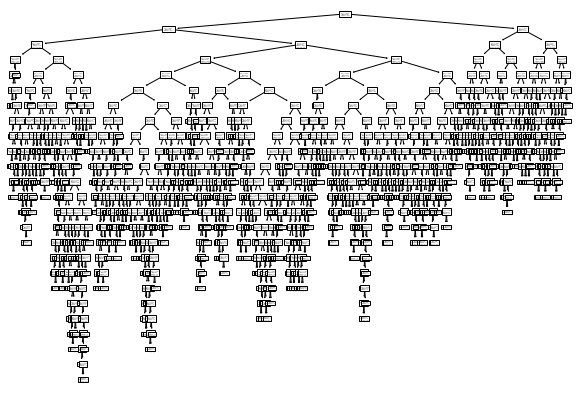

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

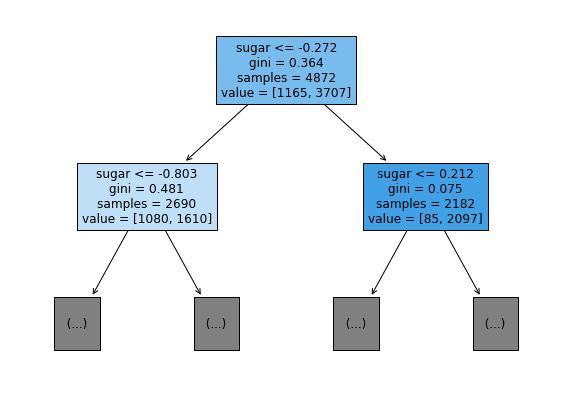

In [8]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [19]:
dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt1.fit(t_x, t_y)
dt1.score(t_x,t_y), dt1.score(tt_x,tt_y)

(0.8499589490968801, 0.8363076923076923)

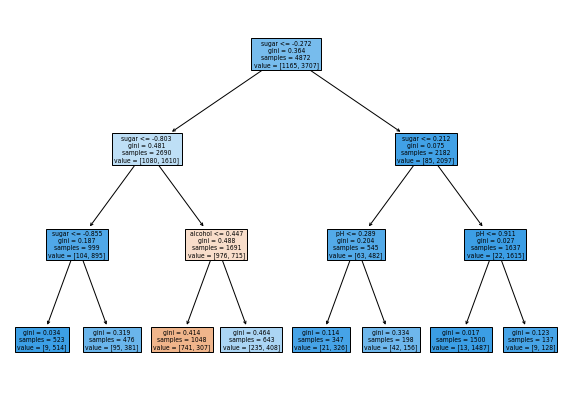

In [20]:
plt.figure(figsize = (10,7))
plot_tree(dt1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
dt1.feature_importances_

array([0.12871631, 0.86213285, 0.00915084])